Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.4146 - val_loss: 0.3405
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3261 - val_loss: 0.3193
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3115 - val_loss: 0.3079
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.3018 - val_loss: 0.3004
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2958 - val_loss: 0.2957
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2920 - val_loss: 0.2927
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2895 - val_loss: 0.2907
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2878 - val_loss: 0.2893
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2866 - val_loss: 0.2885
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2858 - val_loss: 

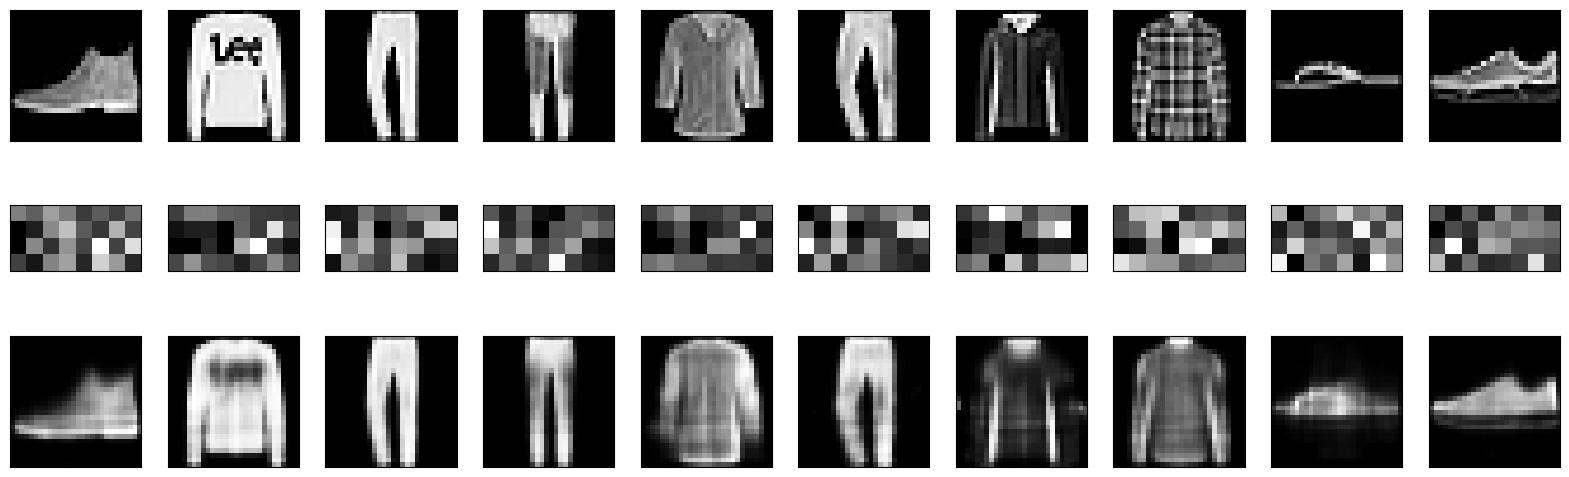

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist  # Import Fashion MNIST dataset

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()  # TRAIN AND TESTING

# Normalize pixel values to be between 0 and 1  # MATRIX
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder  # VECTOR
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 32  # Size of the encoded representations
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder  # HYPERPARAMETER
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test)

# Display original, encoded, and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8))  # Display encoded representation
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()